In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from scipy import stats
from sklearn import datasets
from IPython.display import display, HTML
auto = pd.read_csv('Auto.csv')
auto = auto.drop(auto[auto.values == '?'].index)
auto = auto.reset_index()
auto.head()

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement'>,
        <Axes: xlabel='weight', ylabel='displacement'>,
        <Axes: xlabel='acceleration', ylabel='di

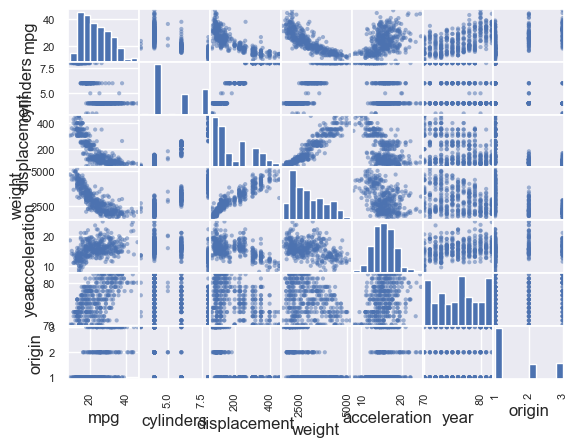

In [4]:
pd.plotting.scatter_matrix(auto)

In [10]:
auto.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_16104\668445388.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  auto.corr()


,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_16104\1122597231.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = auto.corr()


<Axes: >

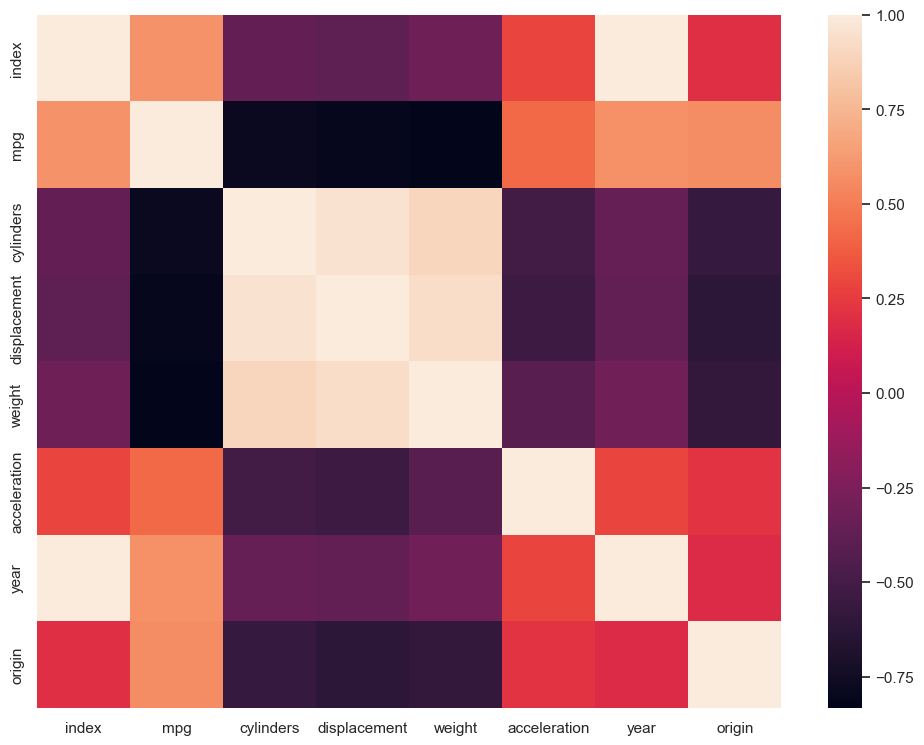

In [17]:
corrmat = auto.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat)

In [18]:
reg = smf.ols('mpg~cylinders+displacement+horsepower+weight+acceleration+year+origin',auto).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     28.58
Date:                Wed, 03 Jan 2024   Prob (F-statistic):          9.82e-107
Time:                        18:48:53   Log-Likelihood:                -899.19
No. Observations:                 392   AIC:                             1996.
Df Residuals:                     293   BIC:                             2390.
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -18.9752      4.228     -4.488      0.000     -27.297     -10.653
horsepower[T.102]    -1.4361      2.901     -0.495      0.621      -7.145       4.273
horsepower[T.103]    -3.6136      2.901     -1.246      0.214      -9.323       2.096
horsepower[T.105]     1.0225      1.054      0.970      0.333      -1.052       3.097
horsepower[T.107]     0.0496      2.929      0.017      0.986      -5.715       5.814
horsepower[T.108]    -4.6326      2.947     -1.572      0.117     -10.433       1.167
horsepower[T.110]    -0.6827      0.959     -0.712      0.477      -2.569       1.204
horsepower[T.112]    -2.3635      1.759     -1.344      0.180      -5.825       1.098
horsepower[T.113]     4.5604      2.897      1.574      0.117      -1.142      10.263
horsepower[T.115]     0.8042      1.461      0.550      0.582      -2.071       3.680
horsepower[T.116]    -2.7546      2.964     -0.929      0.353      -8.588       3.079
horsepower[T.120]    -2.7997      1.631     -1.716      0.087      -6.010       0.411
horsepower[T.122]    -2.5559      2.951     -0.866      0.387      -8.364       3.252
horsepower[T.125]    -1.6187      1.822     -0.889      0.375      -5.204       1.966
horsepower[T.129]    -5.6745      2.188     -2.594      0.010      -9.980      -1.369
horsepower[T.130]    -2.0574      1.576     -1.305      0.193      -5.159       1.044
horsepower[T.132]     4.9304      2.976      1.657      0.099      -0.926      10.787
horsepower[T.133]    -5.7071      2.942     -1.940      0.053     -11.497       0.083
horsepower[T.135]    -2.1038      2.924     -0.719      0.472      -7.858       3.651
horsepower[T.137]    -1.4760      2.953     -0.500      0.618      -7.288       4.336
horsepower[T.138]    -4.0349      2.962     -1.362      0.174      -9.864       1.794
horsepower[T.139]    -2.9510      2.204     -1.339      0.182      -7.288       1.386
horsepower[T.140]    -0.3364      1.477     -0.228      0.820      -3.243       2.570
horsepower[T.142]    -4.3517      2.951     -1.475      0.141     -10.159       1.455
horsepower[T.145]    -2.4873      1.465     -1.698      0.091      -5.370       0.395
horsepower[T.148]    -1.0946      3.033     -0.361      0.718      -7.064       4.875
horsepower[T.149]    -1.3694      2.966     -0.462      0.645      -7.206       4.467
horsepower[T.150]    -1.5043      1.204     -1.249      0.212      -3.874       0.865
horsepower[T.152]    -3.1018      2.985     -1.039      0.300      -8.977       2.774
horsepower[T.153]    -0.5640      2.238     -0.252      0.801      -4.969       3.841
horsepower[T.155]    -1.1024      2.246     -0.491      0.624      -5.523       3.318
horsepower[T.158]    -1.8951      3.004     -0.631      0.529      -7.806       4.016
horsepower[T.160]    -2.3295      2.300     -1.013      0.312      -6.856